In [3]:
import pulp
import pandas as pd
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
import time
import copy
import numpy as np
from scipy.spatial import distance_matrix
import math
import pyomo.environ as pyo            
import sys

### TWO OPT Local Optimisation

1093.22 0
0 33 5 32 22 48 2 47 26 1 31 17 6 49 28 25 27 20 39 36 45 9 10 21 50 37 43 41 3 12 30 24 29 34 46 42 23 11 38 8 4 35 40 18 15 44 16 19 7 13 14
Old -  1093.2241840867136
New -  1038.6635963732192
Old -  1038.6635963732192
New -  1017.8313955922677
Old -  1017.8313955922677
New -  1012.8546980378172
Old -  1012.8546980378172
New -  993.6623680756329
Old -  993.6623680756329
New -  952.6658436251917
Old -  952.6658436251917
New -  962.0462911964908
Old -  952.6658436251917
New -  962.0462911964908
Old -  952.6658436251917
New -  962.0462911964908
Old -  952.6658436251917
New -  962.0462911964908
Old -  952.6658436251917
New -  962.0462911964908
Old -  952.6658436251917
New -  962.0462911964908
Old -  952.6658436251917
New -  962.0462911964908
Old -  952.6658436251917
New -  962.0462911964908
Old -  952.6658436251917
New -  962.0462911964908
Old -  952.6658436251917
New -  962.0462911964908
Old -  952.6658436251917
New -  962.0462911964908
Old -  952.6658436251917
New -  962.0462

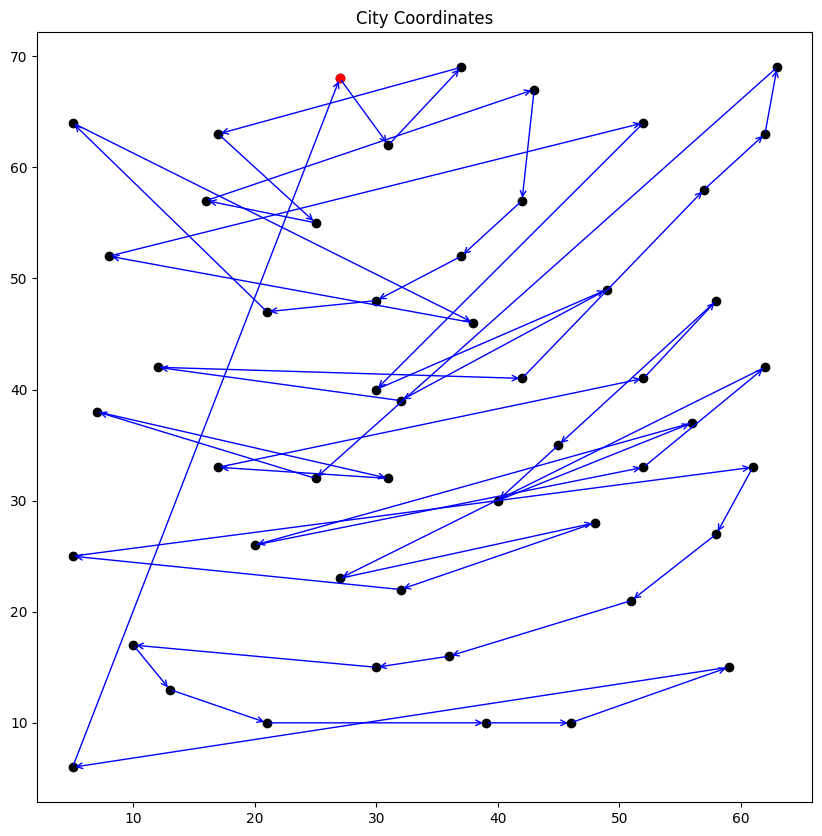

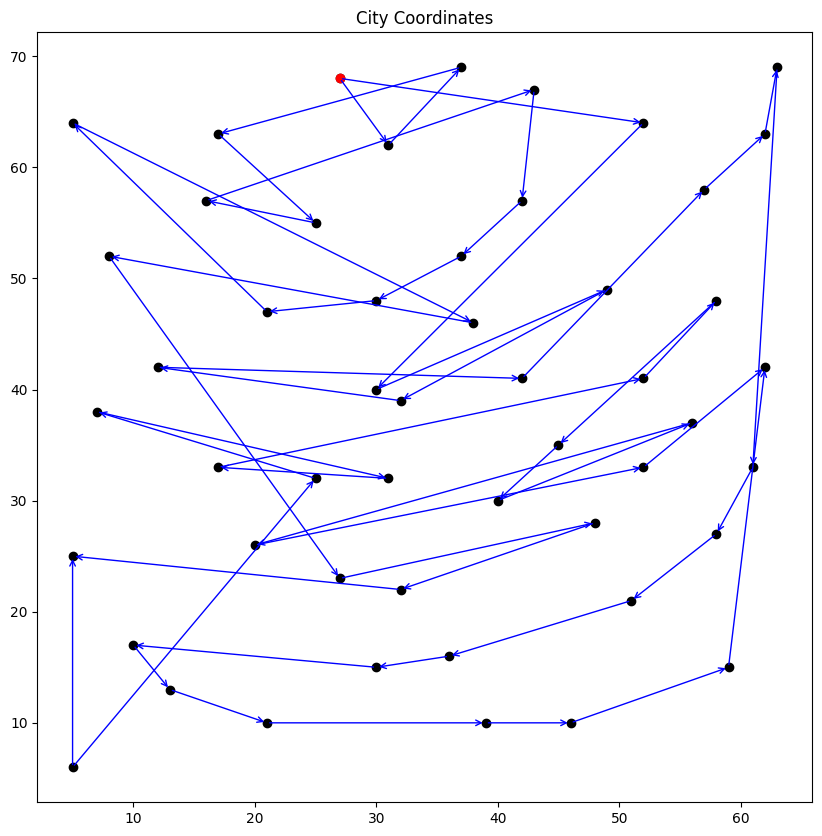

In [42]:
import math
from collections import namedtuple
import random

Point = namedtuple("Point", ['x', 'y'])


# def length(point1, point2):
#     return math.sqrt((point1.x - point2.x)**2 + (point1.y - point2.y)**2)
    
class arc(TSP):
    def __init__(self, start, end):
        self.start = start
        self.end = end
        self.length = self.length(start,end)

class node:
    def __init__(self, x, y, city_name):
        self.x = x
        self.y = y
        self.city_name = city_name

class TSP:
    def __init__(self,input_data):
        self.input_data=input_data
        self.cities = []
        self.tour_length = 0
        self.route = [0]
        self.arcs=[]
        self.output=''

        #populating the tsp with city data 
        lines = input_data.split('\n')
        self.nodeCount = int(lines[0])     
        for i in range(1, self.nodeCount+1):
            line = lines[i]
            parts = line.split()
            self.add_city(node(float(parts[0]), float(parts[1]), i-1))

        self.dist_matrix=self.distance_matrix()


    def add_city(self,node):
        self.cities.append(node)

    def length(self, point1, point2):
        return math.sqrt((point1.x - point2.x)**2 + (point1.y - point2.y)**2)

    #p(n) =0 
    def pdf(self, n, x):
        return ((-2/(n**2))*x) + (2/n)

    # p(n/4)=0
    def pdf2(self, n, x):
        return max(0,((-32/(n**2))*x) + (8/n))
        

    def random_arc(self):
        n = self.nodeCount
        u1 = math.ceil(n * random.random()) #discrete uniform random variable from 0-n
        p_x = self.pdf2(n, u1)
        # print(1/n, p_x)

        # envelope function -  f(x) =  1/n, c =  2
        while True:
            u1 = math.ceil(n * random.random()) #discrete uniform random variable from 0-n
            # p_x = self.pdf(n, u1)
            p_x = self.pdf2(n, u1)
            u2 = random.random()
            if u2 <= ((p_x*n)/8):
                return u1
                

        

    def distance_matrix(self):
        output= np.zeros((len(self.cities),len(self.cities)))
        num_rows, num_cols = output.shape
        for row in range(num_rows):
            for col in range(num_cols):
                if row==col:continue
                output[row][col]=self.length(self.cities[row], self.cities[col])
        return output

    def compute_tour_length(self):
        for arc in self.arcs:
            self.tour_length +=arc.length        
        return self.tour_length
            

    def remove_bad_arcs(self,worst=0):
        temp = sorted(self.arcs, key=lambda x: x.length, reverse=True)
        worst_arc = temp[worst]
        # print (worst_arc.start.city_name, worst_arc.end.city_name)
        temp.remove(worst_arc)
        for arc in temp:
            if worst_arc.start == arc.end or worst_arc.end == arc.start:
                continue
            else:
                second_arc = arc
                break
        self.arcs.remove(worst_arc)
        self.arcs.remove(second_arc)
            
        # print (worst_arc.length)
        return worst_arc.start, worst_arc.end, second_arc.start, second_arc.end
        # pass

    def route_fix():
        pass
        
    def add_new_arcs(self, node1, node2, node3, node4):
        old = self.tour_length
        new = arc(node1,node3).length + arc(node2, node4).length
        for edge in self.arcs:
            new+=edge.length 
        print ("Old - ", old)
        print ("New - ", new)
        if new < old:
            self.arcs.append(arc(node1,node3))
            self.arcs.append(arc(node2, node4))
            self.tour_length = new
            return 1
        else:
            self.arcs.append(arc(node1,node2))
            self.arcs.append(arc(node3, node4))
            return 0

    def visualise_solution(self):
        self.plot_cities()
        arrowprops = dict(arrowstyle='->', connectionstyle='arc3', edgecolor='blue')
        
        for arc in self.arcs:
            plt.annotate('', xy=[arc.end.x, arc.end.y], xytext=[arc.start.x, arc.start.y], arrowprops=arrowprops)

        pass

    def plot_cities(self):
        plt.figure(figsize=(10,10))
        plt.title("City Coordinates")
        x,y=[],[]
        # y=[]
        for city in self.cities:
            x.append(city.x)
            y.append(city.y)
        plt.scatter(np.array(x),np.array(y),c='black')
        plt.scatter(np.array(x[0]),np.array(y[0]),c='red') # Depot
               
    
    def initial_solution_greedy(self):

        #greedy algorithm
        pending_visit= [i for i in range(1,self.nodeCount)]
        current_city = 0
        while len(pending_visit)>0:
            next_city=self.dist_matrix[current_city].tolist().index(sorted(self.dist_matrix[current_city])[1]) #minimum distance excluding distance to itself 
            self.dist_matrix[current_city][next_city]=100000
            # tour+=str(next_city)+" "
            self.route.append(next_city)
            pending_visit.remove(next_city)
        self.route.append(0) #returning to first city
        # self.arcs
        edges = list(zip(self.route[:-1:1], self.route[1::1]))
        for edge in edges:
            self.arcs.append(arc(self.cities[edge[0]],self.cities[edge[1]]))
        # print(self.arcs)
        obj=self.compute_tour_length()

        self.output = '%.2f' % obj + ' ' + str(0) + '\n'
        self.output += ' '.join(map(str, self.route[:-1]))
        print(self.output)
        return self.arcs

    def two_opt(self):
        # print (self.arcs)
        prev = self.tour_length
        worst = 0 #the arc to be removed first, 0 represents the first element of the sorted(descending) list of arc costs
        for i in range(100):
            node1, node2, node3, node4 = self.remove_bad_arcs(worst)
            improvement = self.add_new_arcs(node1, node2, node3, node4)
            if improvement == 0:
                # worst = self.random_arc()
                worst =0
                # break
            
        # node1, node2, node3, node4 = self.remove_bad_arcs()
        # print (node1.city_name, node2.city_name, node3.city_name, node4.city_name)
        # self.visualise_solution()
        # self.add_new_arcs(node1, node2, node3, node4)
        # self.visualise_solution()
        print(self.random_arc())
        # node1, node2, node3, node4 = self.remove_bad_arcs()
        # self.visualise_solution()
        # self.add_new_arcs(node1, node2, node3, node4)
        # self.visualise_solution()
        # node1, node2, node3, node4 = self.remove_bad_arcs()
        # self.visualise_solution()
        # self.add_new_arcs(node1, node2, node3, node4)
        # self.visualise_solution()
        # node1, node2, node3, node4 = self.remove_bad_arcs()
        # self.visualise_solution()
        # self.add_new_arcs(node1, node2, node3, node4)
        # self.visualise_solution()
        # node1, node2, node3, node4 = self.remove_bad_arcs()
        # self.visualise_solution()
        # self.add_new_arcs(node1, node2, node3, node4)
        # self.visualise_solution()
        # node1, node2, node3, node4 = self.remove_bad_arcs()
        # self.visualise_solution()
        # self.add_new_arcs(node1, node2, node3, node4)
        # self.visualise_solution()
        # node1, node2, node3, node4 = self.remove_bad_arcs()
        # self.visualise_solution()
        # self.add_new_arcs(node1, node2, node3, node4)
        self.visualise_solution()
        
        
        # pass

    

    



if __name__ == '__main__':
   
    # file_location = ".\\data\\tsp_10_1.txt"
    file_location = ".\\data\\tsp_51_1"
    # file_location = ".\\data\\tsp_100_3"
    with open(file_location, 'r') as input_data_file:
        input_data = input_data_file.read()

    tsp = TSP(input_data)
    intial_solution = tsp.initial_solution_greedy()
    tsp.visualise_solution()
    tsp.two_opt()
    # print(tsp.arcs)
    # print(tsp.dist_matrix)
    # tsp.plot_cities()




### 2OPT With Route Fix

106758.24 0
0 5 456 501 518 491 494 474 571 8 23 567 12 14 13 9 7 15 24 19 570 18 469 496 500 499 451 317 302 299 258 250 257 245 248 252 262 264 261 263 266 255 301 508 513 237 239 238 222 223 221 219 192 228 531 538 174 180 178 168 159 134 137 138 116 104 550 34 25 26 27 22 28 38 41 43 555 96 95 73 64 124 129 123 70 120 69 71 65 63 90 48 44 559 554 50 52 51 87 118 543 106 94 101 99 544 107 108 110 172 176 109 173 162 161 113 135 112 114 140 160 136 139 157 158 156 144 132 169 165 181 182 166 195 211 214 217 216 215 209 193 225 191 230 188 175 539 534 532 487 492 526 236 229 227 540 533 232 218 185 167 163 170 187 177 171 183 179 190 186 488 535 478 545 541 115 547 561 566 100 556 40 557 552 553 42 32 39 49 91 84 79 75 81 57 58 56 55 83 82 92 61 68 66 127 128 72 62 76 77 122 126 67 117 119 121 111 130 146 152 149 150 151 147 148 141 142 143 133 131 125 105 542 548 562 37 31 565 102 103 564 30 33 35 29 21 560 36 563 479 549 551 98 97 93 80 60 74 78 59 89 88 86 53 54 47 85 45 46 558 546

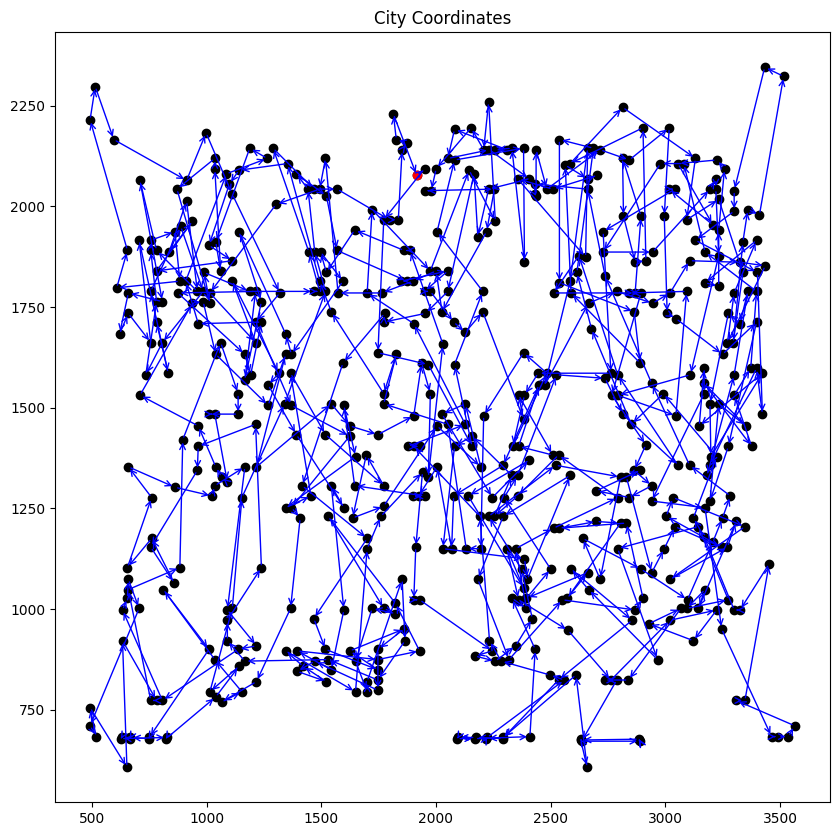

In [11]:
import math
from collections import namedtuple
import random

Point = namedtuple("Point", ['x', 'y'])


# def length(point1, point2):
#     return math.sqrt((point1.x - point2.x)**2 + (point1.y - point2.y)**2)
    
class arc(TSP):
    def __init__(self, start, end):
        self.start = start
        self.end = end
        self.length = self.length(start,end)

class node:
    def __init__(self, x, y, city_name):
        self.x = x
        self.y = y
        self.city_name = city_name

class TSP:
    def __init__(self,input_data):
        self.input_data=input_data
        self.cities = []
        self.tour_length = 0
        self.route = [0]
        self.arcs=[]
        self.output=''

        #populating the tsp with city data 
        lines = input_data.split('\n')
        self.nodeCount = int(lines[0])     
        for i in range(1, self.nodeCount+1):
            line = lines[i]
            parts = line.split()
            self.add_city(node(float(parts[0]), float(parts[1]), i-1))

        self.dist_matrix=self.distance_matrix()

    def route_find(self):
        self.route = [0]
        arcs = 0 
        current = 0
        while True:
            for arc in self.arcs:
                if arc.start.city_name == current:
                    self.route.append(arc.end.city_name)
                    current = arc.end.city_name
                    arcs +=1
                    break 
            if arcs == self.nodeCount:
                break
        # print (self.route)
        return 0


    def add_city(self,node):
        self.cities.append(node)

    def length(self, point1, point2):
        return math.sqrt((point1.x - point2.x)**2 + (point1.y - point2.y)**2)

    #p(n) =0 
    def pdf(self, n, x):
        return ((-2/(n**2))*x) + (2/n)

    # p(n/4)=0
    def pdf2(self, n, x):
        return max(0,((-32/(n**2))*x) + (8/n))
        

    def random_arc(self):
        n = self.nodeCount
        u1 = math.ceil(n * random.random()) #discrete uniform random variable from 0-n
        p_x = self.pdf2(n, u1)
        # print(1/n, p_x)

        # envelope function -  f(x) =  1/n, c =  2
        while True:
            u1 = math.ceil(n * random.random()) #discrete uniform random variable from 0-n
            p_x = self.pdf(n, u1)
            # p_x = self.pdf2(n, u1)
            u2 = random.random()
            if u2 <= ((p_x*n)/8):
                return u1
                

    def distance_matrix(self):
        output= np.zeros((len(self.cities),len(self.cities)))
        num_rows, num_cols = output.shape
        for row in range(num_rows):
            for col in range(num_cols):
                if row==col:continue
                output[row][col]=self.length(self.cities[row], self.cities[col])
        return output

    def compute_tour_length(self):
        for arc in self.arcs:
            self.tour_length +=arc.length        
        return self.tour_length
            

    def remove_bad_arcs(self,worst=0):
        temp = sorted(self.arcs, key=lambda x: x.length, reverse=True)
        worst_arc = temp[worst]
        # print (worst_arc.start.city_name, worst_arc.end.city_name)
        temp.remove(worst_arc)
        for arc in temp:
            if worst_arc.start == arc.end or worst_arc.end == arc.start  or worst_arc.start == arc.start or worst_arc.end == arc.end:
                continue
            else:
                second_arc = arc
                break
        self.arcs.remove(worst_arc)
        self.arcs.remove(second_arc)
        return worst_arc.start, worst_arc.end, second_arc.start, second_arc.end


    # def route_fix(self):
    #     # Route_fix is fucked 

    #     # finding which node is affected
    #     # reach =0
    #     for i in range(len(self.arcs)):
    #         for j in range(len(self.arcs)):
    #             if i == j : continue
    #             # if self.arcs[i] in [arc1,arc2] or self.arcs[j] in [arc1,arc2] : continue
    #             if self.arcs[j].start == self.arcs[i].start or self.arcs[j].end == self.arcs[i].end:
    #                 # print("hi")
    #                 self.arcs[j].start, self.arcs[j].end = self.arcs[j].end, self.arcs[j].start
    #                 break

    def route_fix(self, new_arc):

        current = new_arc
        flag = True
        while flag == True:
            no_conflict = 1 #no conflicts with itself
            for arc in self.arcs:
                if current == arc: continue
                if arc.start == current.start or arc.end == current.end:
                    arc.start, arc.end = arc.end, arc.start
                    current = arc
                    break
                else:
                    no_conflict += 1
            if no_conflict == self.nodeCount:
                flag = False
                
                    
    def add_new_arcs(self, node1, node2, node3, node4):
        old = self.tour_length
        new = arc(node1,node3).length + arc(node2, node4).length
        for edge in self.arcs:
            new+=edge.length 
        # print ("Old - ", old)
        # print ("New - ", new)
        if new < old:
            self.arcs.append(arc(node1,node3))
            self.arcs.append(arc(node2, node4))
            # self.arcs.append(arc(node3,node1))
            # self.arcs.append(arc(node4, node2))
            self.route_fix(arc(node1,node3))
            self.tour_length = new
            return 1 #improvement
        else:
            self.arcs.append(arc(node1,node2))
            self.arcs.append(arc(node3, node4))
            return 0 #no improvement



    def visualise_solution(self):
        self.plot_cities()
        arrowprops = dict(arrowstyle='->', connectionstyle='arc3', edgecolor='blue')
        
        for arc in self.arcs:
            plt.annotate('', xy=[arc.end.x, arc.end.y], xytext=[arc.start.x, arc.start.y], arrowprops=arrowprops)

        pass

    def plot_cities(self):
        plt.figure(figsize=(10,10))
        plt.title("City Coordinates")
        x,y=[],[]
        # y=[]
        for city in self.cities:
            x.append(city.x)
            y.append(city.y)
        plt.scatter(np.array(x),np.array(y),c='black')
        plt.scatter(np.array(x[0]),np.array(y[0]),c='red') # Depot
               
    
    def initial_solution_greedy(self):

        #greedy algorithm
        pending_visit= [i for i in range(1,self.nodeCount)]
        current_city = 0
        while len(pending_visit)>0:
            next_city=self.dist_matrix[current_city].tolist().index(sorted(self.dist_matrix[current_city])[1]) #minimum distance excluding distance to itself 
            self.dist_matrix[current_city][next_city]=100000
            # tour+=str(next_city)+" "
            self.route.append(next_city)
            pending_visit.remove(next_city)
        self.route.append(0) #returning to first city
        # self.arcs
        edges = list(zip(self.route[:-1:1], self.route[1::1]))
        for edge in edges:
            self.arcs.append(arc(self.cities[edge[0]],self.cities[edge[1]]))
        # print(self.arcs)
        obj=self.compute_tour_length()

        self.output = '%.2f' % obj + ' ' + str(0) + '\n'
        self.output += ' '.join(map(str, self.route[:-1]))
        # print(self.output)
        return self.arcs

    def two_opt(self):
        # print (self.arcs)
        # prev = self.tour_length
        worst = 0 #the arc to be removed first, 0 represents the first element of the sorted(descending) list of arc costs
        for i in range(10000):
            # self.route_fix()
            node1, node2, node3, node4 = self.remove_bad_arcs(worst)
            # self.visualise_solution()
            # print(node1.start.city_name, node2.city_name)
            improvement = self.add_new_arcs(node1, node2, node3, node4)
            # self.route_fix()
            # self.route_fix(node1)
            if improvement == 0:
                # break
                worst = self.random_arc()
                # worst =0
                # break
        # self.route_fix()  
        # self.visualise_solution()
        self.route_find()

        self.output=''
        obj=self.tour_length
        self.output = '%.2f' % obj + ' ' + str(0) + '\n'
        self.output += ' '.join(map(str, self.route[:-1]))
        print(self.output)
        
        
        # pass

    

    



if __name__ == '__main__':
   
    # file_location = ".\\data\\tsp_10_1.txt"
    # file_location = ".\\data\\tsp_51_1"
    # file_location = ".\\data\\tsp_100_3"
    file_location = ".\\data\\tsp_574_1"
    with open(file_location, 'r') as input_data_file:
        input_data = input_data_file.read()

    tsp = TSP(input_data)
    intial_solution = tsp.initial_solution_greedy()
    # tsp.visualise_solution()
    tsp.two_opt()
    tsp.visualise_solution()
    # print(tsp.arcs)
    # print(tsp.dist_matrix)
    # tsp.plot_cities()




It should be
pointed out that 3-opt heuristic is not a trivial extension of 2-opt heuristic: for any two
links selected by a 2-opt heuristic, we have only one way to reconnect them. In contrast,
after selecting 3 links from a tentative tour, we have a total of 7 ways to reconnect them
and a 3-opt heuristic should determine the best reconnecting type, which makes the design
of effective 3-opt heuristics extremely challenging.

### 2opt -both arcs randomised

166071.36 0
0 49 199 125 155 168 174 129 161 26 33 12 80 178 87 23 179 78 180 119 148 164 93 185 37 137 31 10 65 104 16 146 167 89 40 51 7 83 139 109 96 136 88 171 166 22 138 45 120 97 69 169 48 145 41 189 152 14 124 72 68 108 100 38 194 133 172 60 73 184 153 90 62 53 111 157 21 183 106 170 126 197 187 151 102 15 75 156 70 122 76 121 110 192 42 6 79 193 57 131 160 128 95 3 85 66 107 35 134 74 63 198 92 158 154 142 77 159 127 28 190 173 71 175 43 64 196 30 98 56 188 149 84 58 59 186 13 67 44 32 52 39 2 17 165 82 5 176 123 4 81 117 115 182 61 103 24 113 19 34 163 195 36 101 141 8 144 105 50 118 135 18 191 177 54 132 99 116 112 181 9 29 91 1 114 140 46 25 86 20 143 47 162 11 147 27 130 55 94 150
34829.84 0
0 49 168 161 125 199 155 180 146 78 12 178 87 26 23 164 40 83 136 171 14 153 62 53 90 38 72 187 70 122 121 3 92 43 59 52 154 42 76 15 151 157 183 106 68 133 126 75 160 134 71 56 30 77 193 79 156 64 173 98 44 165 32 67 13 186 159 85 95 188 142 84 63 149 58 5 39 82 2 176 4 123 117 61 34 2

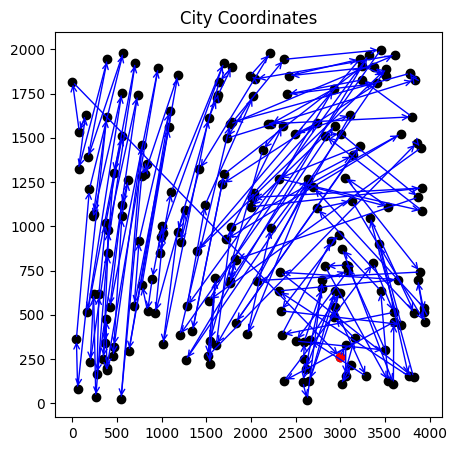

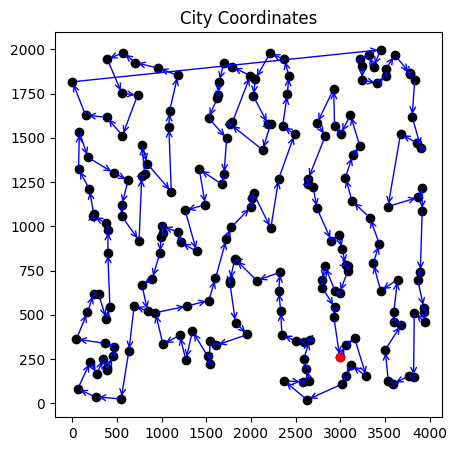

In [39]:
import math
from collections import namedtuple
import random

Point = namedtuple("Point", ['x', 'y'])


# def length(point1, point2):
#     return math.sqrt((point1.x - point2.x)**2 + (point1.y - point2.y)**2)
    


class node:
    def __init__(self, x, y, city_name):
        self.x = x
        self.y = y
        self.city_name = city_name

class TSP:
    def __init__(self,input_data):
        self.input_data=input_data
        self.cities = []
        self.tour_length = 0
        self.route = [0]
        self.arcs=[]
        self.output=''

        #populating the tsp with city data 
        lines = input_data.split('\n')
        self.nodeCount = int(lines[0])     
        for i in range(1, self.nodeCount+1):
            line = lines[i]
            parts = line.split()
            self.add_city(node(float(parts[0]), float(parts[1]), i-1))

        self.dist_matrix=self.distance_matrix()

    def route_find(self):
        self.route = [0]
        arcs = 0 
        current = 0
        while True:
            for arc in self.arcs:
                if arc.start.city_name == current:
                    self.route.append(arc.end.city_name)
                    current = arc.end.city_name
                    arcs +=1
                    break 
            if arcs == self.nodeCount:
                break
        # print (self.route)
        return 0


    def add_city(self,node):
        self.cities.append(node)

    def length(self, point1, point2):
        return math.sqrt((point1.x - point2.x)**2 + (point1.y - point2.y)**2)

    #p(n) =0 
    def pdf(self, n, x):
        return ((-2/(n**2))*x) + (2/n)

    # p(n/4)=0
    def pdf2(self, n, x):
        return max(0,((-32/(n**2))*x) + (8/n))
        

    def random_arc(self):
        n = self.nodeCount
        u1 = math.ceil(n * random.random()) #discrete uniform random variable from 0-n
        p_x = self.pdf2(n, u1)
        # print(1/n, p_x)

        # envelope function -  f(x) =  1/n, c =  2
        while True:
            u1 = math.ceil(n * random.random()) #discrete uniform random variable from 0-n
            p_x = self.pdf(n, u1)
            # p_x = self.pdf2(n, u1)
            u2 = random.random()
            if u2 <= ((p_x*n)/8):
                return u1
                

    def distance_matrix(self):
        output= np.zeros((len(self.cities),len(self.cities)))
        num_rows, num_cols = output.shape
        for row in range(num_rows):
            for col in range(num_cols):
                if row==col:continue
                output[row][col]=self.length(self.cities[row], self.cities[col])
        return output

    def compute_tour_length(self):
        for arc in self.arcs:
            self.tour_length +=arc.length        
        return self.tour_length
            

    def remove_bad_arcs(self,worst=0):
        temp = sorted(self.arcs, key=lambda x: x.length, reverse=True)
        worst_arc = temp[worst]
        # print (worst_arc.start.city_name, worst_arc.end.city_name)
        
        if worst != 0:
            while True:
                arc = temp[self.random_arc()]
                if worst_arc.start == arc.end or worst_arc.end == arc.start  or worst_arc.start == arc.start or worst_arc.end == arc.end:
                    continue
                else:
                    second_arc = arc
                    break
        else:
            temp.remove(worst_arc)
            for arc in temp:
                if worst_arc.start == arc.end or worst_arc.end == arc.start  or worst_arc.start == arc.start or worst_arc.end == arc.end:
                    continue
                else:
                    second_arc = arc
                    break
        self.arcs.remove(worst_arc)
        self.arcs.remove(second_arc)
        return worst_arc.start, worst_arc.end, second_arc.start, second_arc.end


    # def route_fix(self):
    #     # Route_fix is fucked 

    #     # finding which node is affected
    #     # reach =0
    #     for i in range(len(self.arcs)):
    #         for j in range(len(self.arcs)):
    #             if i == j : continue
    #             # if self.arcs[i] in [arc1,arc2] or self.arcs[j] in [arc1,arc2] : continue
    #             if self.arcs[j].start == self.arcs[i].start or self.arcs[j].end == self.arcs[i].end:
    #                 # print("hi")
    #                 self.arcs[j].start, self.arcs[j].end = self.arcs[j].end, self.arcs[j].start
    #                 break

    def route_fix(self, new_arc):

        current = new_arc
        flag = True
        while flag == True:
            no_conflict = 1 #no conflicts with itself
            for arc in self.arcs:
                if current == arc: continue
                if arc.start == current.start or arc.end == current.end:
                    arc.start, arc.end = arc.end, arc.start
                    current = arc
                    break
                else:
                    no_conflict += 1
            if no_conflict == self.nodeCount:
                flag = False
                
                    
    def add_new_arcs(self, node1, node2, node3, node4):
        old = self.tour_length
        new = arc(node1,node3).length + arc(node2, node4).length
        for edge in self.arcs:
            new+=edge.length 
        # print ("Old - ", old)
        # print ("New - ", new)
        if new < old:
            self.arcs.append(arc(node1,node3))
            self.arcs.append(arc(node2, node4))
            # self.arcs.append(arc(node3,node1))
            # self.arcs.append(arc(node4, node2))
            self.route_fix(arc(node1,node3))
            self.tour_length = new
            return 1 #improvement
        else:
            self.arcs.append(arc(node1,node2))
            self.arcs.append(arc(node3, node4))
            return 0 #no improvement



    def visualise_solution(self):
        self.plot_cities()
        arrowprops = dict(arrowstyle='->', connectionstyle='arc3', edgecolor='blue')
        
        for arc in self.arcs:
            plt.annotate('', xy=[arc.end.x, arc.end.y], xytext=[arc.start.x, arc.start.y], arrowprops=arrowprops)

        pass

    def plot_cities(self):
        # plt.figure(figsize=(10,10))
        plt.figure(figsize=(5,5))
        plt.title("City Coordinates")
        x,y=[],[]
        # y=[]
        for city in self.cities:
            x.append(city.x)
            y.append(city.y)
        plt.scatter(np.array(x),np.array(y),c='black')
        plt.scatter(np.array(x[0]),np.array(y[0]),c='red') # Depot
               
    
    def initial_solution_greedy(self):

        #greedy algorithm
        pending_visit= [i for i in range(1,self.nodeCount)]
        current_city = 0
        while len(pending_visit)>0:
            next_city=self.dist_matrix[current_city].tolist().index(sorted(self.dist_matrix[current_city])[1]) #minimum distance excluding distance to itself 
            self.dist_matrix[current_city][next_city]=1000000000000000
            # tour+=str(next_city)+" "
            self.route.append(next_city)
            pending_visit.remove(next_city)
        self.route.append(0) #returning to first city
        # self.arcs
        edges = list(zip(self.route[:-1:1], self.route[1::1]))
        for edge in edges:
            self.arcs.append(arc(self.cities[edge[0]],self.cities[edge[1]]))
        # print(self.arcs)
        obj=self.compute_tour_length()

        self.output = '%.2f' % obj + ' ' + str(0) + '\n'
        self.output += ' '.join(map(str, self.route[:-1]))
        return self.output
        # return self.arcs

    def two_opt(self):
        # print (self.arcs)
        # prev = self.tour_length
        worst = 0 #the arc to be removed first, 0 represents the first element of the sorted(descending) list of arc costs
        for i in range(100000):
            # self.route_fix()
            node1, node2, node3, node4 = self.remove_bad_arcs(worst)
            # self.visualise_solution()
            # print(node1.start.city_name, node2.city_name)
            improvement = self.add_new_arcs(node1, node2, node3, node4)
            # self.route_fix()
            # self.route_fix(node1)
            if improvement == 0:
                # break
                worst = self.random_arc()
                # worst =0
                # break
        # self.route_fix()  
        # self.visualise_solution()
        self.route_find()

        self.output=''
        obj=self.tour_length
        self.output = '%.2f' % obj + ' ' + str(0) + '\n'
        self.output += ' '.join(map(str, self.route[:-1]))
        print(self.output)
        
        
        # pass

    
class arc(TSP):
    def __init__(self, start, end):
        self.start = start
        self.end = end
        self.length = self.length(start,end)
    



if __name__ == '__main__':
   
    # file_location = ".\\data\\tsp_10_1.txt"
    # file_location = ".\\data\\tsp_51_1"      #MILP - 10 points
    # file_location = ".\\data\\tsp_100_3"     #200000 iterations - 2OPT
    file_location = ".\\data\\tsp_200_2"   #100000 iterations - 2OPT
    # file_location = ".\\data\\tsp_574_1"    #1000000 iterations - 43160.17 
    # file_location = ".\\data\\tsp_33810_1"    #1000000 iterations - 43160.17
    with open(file_location, 'r') as input_data_file:
        input_data = input_data_file.read()

    tsp = TSP(input_data)
    initial_solution = tsp.initial_solution_greedy()
    print(initial_solution)
    tsp.visualise_solution()
    # tsp.visualise_solution()
    if tsp.nodeCount >600:
        print (initial_solution)
    else:
        tsp.two_opt()
        tsp.visualise_solution()
    # print(tsp.arcs)
    # print(tsp.dist_matrix)
    # tsp.plot_cities()


